## Import the libraries

In [2]:
# Import libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

## Read and transform data


In [3]:
mnist = fetch_openml('mnist_784')
input_data, y = mnist['data'], mnist['target']

In [4]:
y[:7]

array(['5', '0', '4', '1', '9', '2', '1'], dtype=object)

In [5]:
input_data = input_data/255
n_digits = 10
y_one_hot = np.zeros([y.shape[0], n_digits])
for i in range(y.shape[0]):
    y_one_hot[i, int(y[i])] = 1
y = y_one_hot

In [6]:
m = 60000
m_test = input_data.shape[0] - m
y_train, y_test = y[:m, :].reshape(m, n_digits), y[m:, :].reshape(m_test, n_digits)
x_train, x_test = input_data[:m, :], input_data[m:, :]
np.random.seed(1002)

## Show a random input



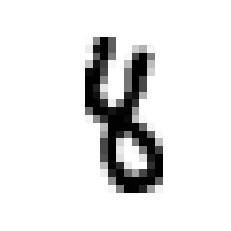

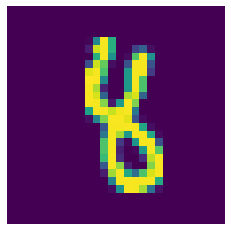

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [7]:
j = 7000

plt.imshow(x_train[j, :].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()
plt.imshow(x_train[j, :].reshape(28, 28))
plt.axis('off')
plt.show()
print(y_train[j])

## Define activation, loss, and their derivatives



In [21]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    
def sigmoid_derivative(z):
    return z * (1 - z)
    
def reLU(x):
    return np.maximum(0, x) 
    
def reLU_derivative(x):
    return 0.5 * (np.sign(x) + 1)

def cross_entropy_loss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum
    return L
    
def softmax(y):
    return np.exp(y)/np.sum(np.exp(y), axis = 0)
    
def CE_softmax_derivative(output, ideal_output):
    return (output - ideal_output)
    

In [29]:
input_data_dim = x_train.shape[1]
n_hidden = 64
learning_rate = 1
weight_decay = 0.001
W1 = 0.01 * np.random.randn(n_hidden, input_data_dim)
b1 = np.zeros((n_hidden, 1))
W2 = 0.01 * np.random.randn(n_digits, n_hidden)
b2 = np.zeros((n_digits, 1))

## Forward and Backward Propagation

Epoch : 0, cost : 0.32900626336465627
Epoch : 10, cost : 0.3194145700223612
Epoch : 20, cost : 0.2920830150736541
Epoch : 30, cost : 0.48136870235309087
Epoch : 40, cost : 0.26780137446901525
Epoch : 50, cost : 0.2722512088640856
Epoch : 60, cost : 0.2752721741946281
Epoch : 70, cost : 0.24082860027678582
Epoch : 80, cost : 0.2352439109004023
Epoch : 90, cost : 0.26487349539083554
Epoch : 100, cost : 0.23883146632179605
Epoch : 110, cost : 0.22479998712528992
Epoch : 120, cost : 0.22124368514494155
Epoch : 130, cost : 0.3152680912283554
Epoch : 140, cost : 0.22589444701970987


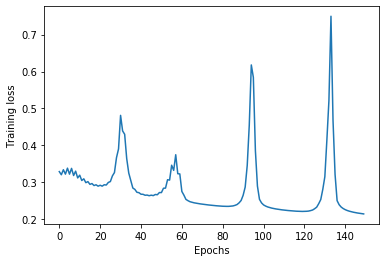

In [37]:
n_epochs = 150
cost_plot = np.zeros(n_epochs)

for k in range(n_epochs):
    # forward propagation
    
    Z1 = np.matmul(W1, x_train.T) + b1
    A1 = reLU(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)
    
    cost = cross_entropy_loss(y_train.T, A2)
    cost_plot[k] = cost
    
    # backward propagation
    
    dZ2 = CE_softmax_derivative(A2, y_train.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * reLU_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, x_train)
    db1 = (1./m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if k%10 == 0:
        print("Epoch : {0}, cost : {1}".format(k, cost))
        
plt.plot(cost_plot)
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()
    

In [38]:
Z1 = np.matmul(W1, x_test.T) + b1
A1 = reLU(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = softmax(Z2)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

from sklearn.metrics import accuracy_score
accuracy_score(labels, predictions)

[[ 958    0   11    2    1    9    9    2    5   11]
 [   0 1115    4    1    1    2    3   11    8    3]
 [   1    1  952   19    4    1    6   23    8    1]
 [   2    4   13  937    0   28    1    2   23   12]
 [   0    0   10    1  923    5   11    7    5   46]
 [   5    0    1   19    0  808   11    1    9    3]
 [   6    3   11    1   14   10  913    1   13    1]
 [   2    2   10   11    2    5    1  965    8    8]
 [   4   10   18   12    3   19    3    0  892   11]
 [   2    0    2    7   34    5    0   16    3  913]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1008
           1       0.98      0.97      0.98      1148
           2       0.92      0.94      0.93      1016
           3       0.93      0.92      0.92      1022
           4       0.94      0.92      0.93      1008
           5       0.91      0.94      0.92       857
           6       0.95      0.94      0.95       973
           7       0.94      0.95   

0.9376